In [119]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import re
import os
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences

In [22]:
import numpy as np
import pandas as pd
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding, Input, RepeatVector
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import scikitplot.plotters as skplt
import os



Using TensorFlow backend.


In [16]:
#download the model to local so it can be used again and again
#!mkdir -p module/module_elmo2
# Download the module, and uncompress it to the destination folder. 
#!curl -L "https://tfhub.dev/google/elmo/2?tf-hub-format=compressed" | tar -zxvC module/module_elmo2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
x assets/
x saved_model.pb
x tfhub_module.pb
x variables/
x variables/variables.index
100  331M  100  331M    0     0  2076k      0  0:02:43  0:02:43 --:--:-- 1823kk      0  0:01:04  0:00:11  0:00:53 4845k89k      0  0:02:16  0:00:59  0:01:17 1847k56M    0     0  2419k      0  0:02:20  0:01:06  0:01:14 1833k0     0  2261k      0  0:02:29  0:01:31  0:00:58 1836k2135k      0  0:02:38  0:02:10  0:00:28 1989k



In [23]:
FNC_Final= pd.read_csv('data/FNC_Final.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
FNC_Final.head()



,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,domain,type,url,content,scraped_at,inserted_at,...,summary,source,len_content,len_title,num_exclaim_title,num_sentences_content,sentences_content,num_paras,num_punc_content,percent_punc_content_per_len
0,2,2,114,138,coed.com,fake,https://coed.com/2018/01/23/boston-celtics-vs-...,VIEW GALLERY\n\nThe Boston Celtics are traveli...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,...,NaN,NaN,694,7,0,31,['VIEW GALLERY\n\nThe Boston Celtics are trave...,37,149,21.469741
1,3,3,150,176,beforeitsnews.com,fake,http://beforeitsnews.com/prophecy/2018/01/the-...,The Truth About the Israel-Palestine Conflict\...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,...,NaN,NaN,2663,6,0,102,['The Truth About the Israel-Palestine Conflic...,165,565,21.216673
2,6,6,345,408,betootaadvocate.com,satire,http://www.betootaadvocate.com/humans-of-betoo...,ERROL PARKER | Editor-at-large | Contact\n\n“H...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,...,NaN,NaN,406,11,0,29,['ERROL PARKER | Editor-at-large | Contact\n\n...,43,141,34.729064
3,7,7,369,433,beehivebugle.com,satire,http://beehivebugle.com/2013/11/18/american-fo...,American Fork’s East 17th Ward’s excitement er...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,...,NaN,NaN,459,11,0,25,['American Fork’s East 17th Ward’s excitement ...,15,113,24.618736
4,12,12,603,685,beforeitsnews.com,fake,http://beforeitsnews.com/watercooler-topics/20...,Hobby Historian Claims to Have Discovered Forg...,2018-01-25 16:17:44.789555,2018-02-02 01:19:41.756632,...,NaN,NaN,172,13,0,9,['Hobby Historian Claims to Have Discovered Fo...,11,62,36.046512


In [115]:
def cleanText(text):
    #remove EOL 
    text = text.strip().replace("\n", " ").replace("\r", " ")
    text= text.split(" ")
    
    #remove stop words 
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops]
    
    # preprocess data to standardize lengths
    text= text[0:999]
        
    text=' '.join(text)
    
#     text = replace_contraction(text)
#     text = replace_links(text, "link")
#     text = remove_numbers(text)
#     text = re.sub(r'[,!@#$%^&*)(|/><";:.?\'\\}{]',"",text)
#     text = text.lower()
    return text

In [59]:
sentence_input = cleanText(FNC_Final['content'][0:1][0])
len (sentence_input)

2878

In [63]:
# create embeddings for one of the articles sentences from the FNC dataset
elmo = hub.Module("module/module_elmo2/", trainable=True)

sentence_input = list(cleanText(FNC_Final['content'][0:1][0]))

embeddings = elmo(
sentence_input,
signature="default",
as_dict=True)["elmo"]

embeddings = tf.reshape(embeddings,[-1,1024])

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    LifeIllusion = session.run(embeddings)
    
print(LifeIllusion)
print(LifeIllusion.shape)


[[ 0.25423464 -0.8940732  -0.02514392 ...  0.06810512 -0.41934192
  -0.03616357]
 [-1.2254356  -0.5600414  -0.17601374 ...  0.22459243 -0.39447024
  -0.13764521]
 [-0.5341146  -0.6158735  -0.56610096 ... -0.16593632 -0.35328364
  -0.04602914]
 ...
 [-0.65281457  0.3607911  -0.15394424 ...  0.05694397  0.06642541
   0.3493764 ]
 [ 0.12321749 -0.3254964  -0.46529466 ...  0.34293878  0.05647942
   0.3826133 ]
 [-0.466352   -0.18451743 -0.12319481 ... -0.08025219  0.03607737
   0.1128069 ]]
(2878, 1024)


In [28]:
FNC_Final['type'].count()

142395

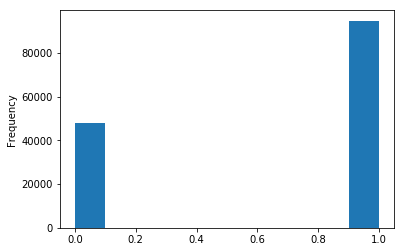

In [64]:
# change "reliable", "nan", and 'unkown' to 0
# change "rumor","hate","unreliable", etc. to 1
FNC_Final['label']= FNC_Final['type']
FNC_Final.loc[FNC_Final['type'] == 'reliable', 'label'] = 0
FNC_Final.loc[FNC_Final['type'] == 'satire', 'label'] = 1
FNC_Final.loc[FNC_Final['type'] == 'fake', 'label'] = 1
FNC_Final.loc[FNC_Final['type'] == 'bias', 'label'] = 1
FNC_Final.loc[FNC_Final['type'] == 'political', 'label'] = 1

# plot the distribution, as can be seen it is heavily skewed to fake news
FNC_Final['label'].plot.hist()


In [116]:
x = np.array(FNC_Final["content"].apply(cleanText))
y = np.array(FNC_Final["label"])

print(y[0])
print(x[0])

1
VIEW GALLERY  The Boston Celtics traveling west coast battle longtime rival LA Lakers. The rivalry dates back days Magic vs. Bird grown Kobe vs. Big 3. Now time start new era Lakers Celtics rivalry names like Irving, Tatum, Ball, Ingram. This prove ’em game Lakers hot streak winning two row adding another big W C’s could wonders moving forward. The Celtics trying snap funk themselves, nice win LA might trick.  The Boston Celtics (34-13) currently three-game losing streak fly Staples Center. The Celtics coming four-game home stand went 1-3, west coast trip lot finish first half season. Boston lead Kyrie Irving who’s one heck season averaging 24.5 points! Al Horford low key leading Celtics assists, rebounds, steals per game, going show beat Lakers.  The Los Angeles Lakers (17-29) fresh second win row 5th straight home blowing Knicks 20! The Lakers might without 2nd overall pick Lonzo Ball one; Ball leads team 7.1 assists rebound per game. Lucky Lakers top two scorers Kyle Kuzman Brando

In [117]:
x.shape


(142395,)

In [120]:
x= pad_sequences(x, value= "PAD", dtype = 'str', padding= 'post', truncating = 'post', maxlen=1000)



TypeError: len() of unsized object

In [118]:
print(len(x[0]))



2878


In [87]:
#get embeddings for x 

elmo = hub.Module("module/module_elmo2/", trainable=True)

sentence_input = tf.constant(shape=[1], name='sentence_input')
embeddings = elmo(sentence_input,signature="default",as_dict=True)["elmo"]
embeddings = tf.reshape(embeddings,[-1,1024])
    

with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    x[i]= session.run(embeddings)
    
print(LifeIllusion)
print(LifeIllusion.shape)

V G  T B C t w c b l r L L T r d b d M v B g K v B 3 N t s n e L C r n l I T B I T p ’ g L h s w t r a a b W C c w m f T C t s f t n w L m t  T B C ( c t l s f S C T C c f h s w 1 w c t l f f h s B l K I w o h s a 2 p A H l k l C a r s p g g s b L  T L A L ( f s w r 5 s h b K 2 T L m w 2 o p L B o B l t 7 a r p g L L t t s K K B I a 1 1 p p g r L W t b w e y r t v B L b e l t T L f b w s C a g c l l  C v L G T T C & V D  E C v L  D T J 2 2  S T 1 P E  L S C L A C  B T  H W C v L L S O  Y b b w S C o v l s W n s l p c p  I d a c s l l s g o D N D o f s t y r f s d f p m b I c s w w c D N a D A T A F T C  I d a c s l w s S T S T s a s w l o T c T c m d m f I l c s T s e i d i T s O p i F c $ m s f s t I c s w w c O s u s d a c s w  H W C v L O Y T O M D  Y l s g W a  Y d F a G P A i W S T F S G a a a f d A T R A T F T  H T L C v L O W C S  Y a l s g S T f t J c S w c “ N 7 D F f t C S O p c $ p m c E a m s c P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P P 

In [73]:
# split data into train and test

msk = np.random.rand(len(x)) < 0.8
x_train = x[msk]
x_test = x[~msk]

y_train = y[msk]
y_test = y[~msk]

#train_data = train[['content','type']].copy()
#test_data = test[['content','type']].copy()

print(len(x_train), len(y_train))
print(len(x_test), len(y_test))
#print(train_data['type'].head(10))
#print(train_data['content'][0])

113918 113918
28477 28477


In [74]:



x_test = pad_sequences(x_test, value= "PAD", dtype = 'str', padding= 'post', truncating = 'post', maxlen=1000)


In [75]:
    np.save('xtr_shuffled.npy',xtr)
    np.save('xde_shuffled.npy',xde)
    np.save('xte_shuffled.npy',xte)
    np.save('yte_shuffled.npy',yte)
    np.save('ytr_shuffled.npy',ytr)
    np.save('yde_shuffled.npy',yde)

1000

In [7]:
# df = pd.read_csv("sentences.csv",encoding="latin")
# df = df[df["sentiment"]!="Neutral"]
# df.loc[df["sentiment"]=='Negative',"sentiment"]=0
# df.loc[df["sentiment"]=='Positive',"sentiment"]=1

FileNotFoundError: [Errno 2] File b'sentences.csv' does not exist: b'sentences.csv'

In [ ]:
# import re
# def cleanText(text):
#     text = text.strip().replace("\n", " ").replace("\r", " ")
#     text = replace_contraction(text)
#     text = replace_links(text, "link")
#     text = remove_numbers(text)
#     text = re.sub(r'[,!@#$%^&*)(|/><";:.?\'\\}{]',"",text)
#     text = text.lower()
#     return text
# X = np.array(df["text"].apply(cleanText))
# y = np.array(df["sentiment"])

In [ ]:
# embed = hub.Module("module/module_elmo2")
# def ELMoEmbedding(x):
#     return embed(tf.squeeze(tf.cast(x, tf.string)), signature="default", as_dict=True)["default"]

In [ ]:
# def build_model(): 
#     input_text = Input(shape=(1,), dtype="string")
#     embedding = Lambda(ELMoEmbedding, output_shape=(1024, ))(input_text)
#     dense = Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001))(embedding)
#     pred = Dense(1, activation='sigmoid')(dense)
#     model = Model(inputs=[input_text], outputs=pred)
#     model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     return model
# model_elmo = build_model()

In [ ]:
# with tf.Session() as session:
#     K.set_session(session)
#     session.run(tf.global_variables_initializer())  
#     session.run(tf.tables_initializer())
#     history = model_elmo.fit(X, y, epochs=5, batch_size=256, validation_split = 0.2)
#     model_elmo.save_weights('./model_elmo_weights.h5')